In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train_tweet.csv')
test = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetsclassify\\test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [4]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [5]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www','amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [6]:
train['normalized'] = train.tweet.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [7]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])
indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))

In [48]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.25,random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [58]:
from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(n_neighbors=7)  
clf.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
targets_pred = clf.predict(data_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(targets_test,targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[7455    5]
 [ 455   76]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7460
           1       0.94      0.14      0.25       531

    accuracy                           0.94      7991
   macro avg       0.94      0.57      0.61      7991
weighted avg       0.94      0.94      0.92      7991

0.9424352396446002


In [88]:
#change to 15 or 10

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

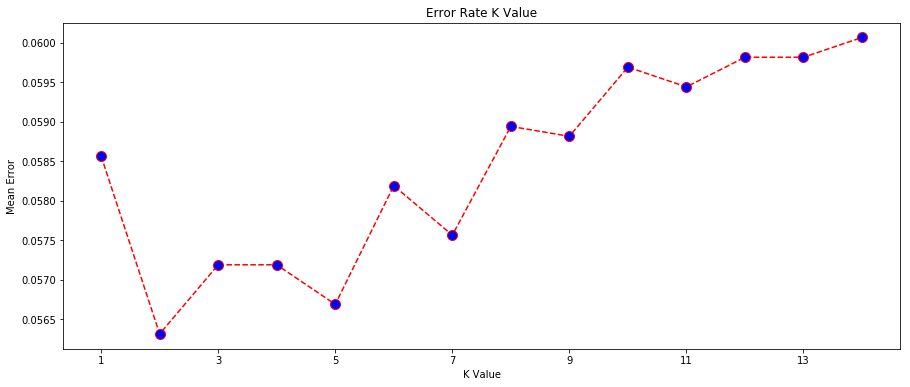

In [90]:
plt.figure(figsize=(15, 6))  
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1,15,2), np.arange(1,15,2))
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [17]:
from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(n_neighbors=5)  
clf.fit(data_train, targets_train)

KNeighborsClassifier()

In [18]:
y_pred = clf.predict(data_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(targets_test,y_pred))
print(classification_report(targets_test,y_pred))
print(accuracy_score(targets_test, y_pred))

[[7442   18]
 [ 435   96]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7460
           1       0.84      0.18      0.30       531

    accuracy                           0.94      7991
   macro avg       0.89      0.59      0.63      7991
weighted avg       0.94      0.94      0.93      7991

0.9433112251282693


In [23]:
#no difference
from imblearn.over_sampling import SMOTE
#import numpy as np
sm = SMOTE(random_state=12)
data_train_res, targets_train_res = sm.fit_sample(data_train, targets_train)
print (targets_train.value_counts() , np.bincount(targets_train_res))

0    22260
1     1711
Name: label, dtype: int64 [22260 22260]


In [64]:
from sklearn.neighbors import KNeighborsClassifier  
mdl = KNeighborsClassifier(n_neighbors=1)  
mdl.fit(data_train_res, targets_train_res)

KNeighborsClassifier(n_neighbors=1)

In [65]:
targets_pred = mdl.predict(data_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(targets_test,targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[7270  190]
 [ 322  209]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7460
           1       0.52      0.39      0.45       531

    accuracy                           0.94      7991
   macro avg       0.74      0.68      0.71      7991
weighted avg       0.93      0.94      0.93      7991

0.9359279189087724


In [61]:
#SMOTE
#3 = 93.4a 27 1r
#1 = 93.5a 39 1r
#5 = 58.37a 77 1r
#7 = 56.54a 79 1r

#NO
#1 = 94.1 37 1r
#3 = 94.2 21 1r
#5 = 94.3 18 1r
#7 = 94.2 18 1r

In [62]:
errors = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train_res, targets_train_res)
    pred_i = knn.predict(data_test)
    errors.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

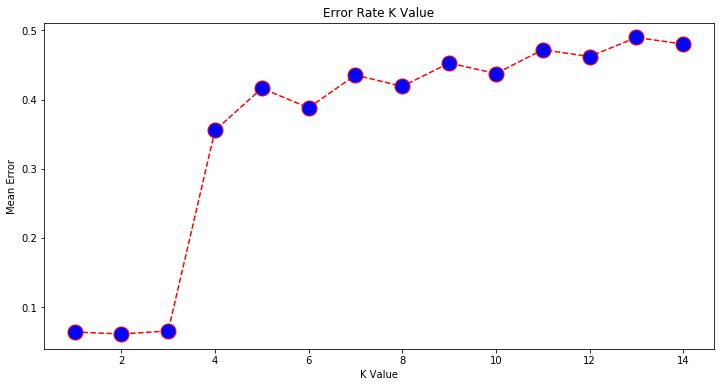

In [63]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), errors, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=15)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

print(f1_score(targets_test, targets_pred))
print(recall_score(targets_test, targets_pred))

0.44946236559139785
0.3935969868173258
